# ECS 171 Project - Detecting Phishing Websites
# label of 1 means not phishing, label of 0 means phishing

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/phishing_url_website.csv')
df.head(n=20)

URL                         Domain  \
0         https://www.southbankmosaics.com       www.southbankmosaics.com   
1                 https://www.uni-mainz.de               www.uni-mainz.de   
2           https://www.voicefmradio.co.uk         www.voicefmradio.co.uk   
3          https://www.globalreporting.org        www.globalreporting.org   
4               https://www.nerdscandy.com             www.nerdscandy.com   
5           https://www.hyderabadonline.in         www.hyderabadonline.in   
6                      https://www.aap.org                    www.aap.org   
7       https://www.religionenlibertad.com     www.religionenlibertad.com   
8                  http://www.teramill.com               www.teramill.com   
9                    https://www.aoh61.com                  www.aoh61.com   
10             https://www.bulgariaski.com            www.bulgariaski.com   
11               https://www.brightika.com              www.brightika.com   
12                   https://www.motley.ie                  www.motley.ie   
13                  https://www.funzine.hu                 www.funzine.hu   
14                 https://www.ooty.ind.in                www.ooty.ind.in   
15              https://www.bwresearch.com             www.bwresearch.com   
16   https://www.musicvideoproduction.guru  www.musicvideoproduction.guru   
17  https://service-mitld.firebaseapp.com/  service-mitld.firebaseapp.com   
18       http://www.kuradox92.lima-city.de     www.kuradox92.lima-city.de   
19             https://liuy-9a930.web.app/             liuy-9a930.web.app   

     TLD  URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
0    com          100.000000                           1   
1     de          100.000000                           2   
2     uk          100.000000                           2   
3    org          100.000000                           1   
4    com          100.000000                           1   
5     in          100.000000                           1   
6    org          100.000000                           1   
7    com          100.000000                           1   
8    com           82.644628                           1   
9    com          100.000000                           1   
10   com          100.000000                           1   
11   com          100.000000                           1   
12    ie          100.000000                           1   
13    hu          100.000000                           1   
14    in          100.000000                           2   
15   com          100.000000                           1   
16  guru          100.000000                           1   
17   com           64.645264                           3   
18    de           45.849802                           3   
19   app           54.515919                           3   

    SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                   0.032        1         558   
1                   0.087        1         618   
2                   0.069        1         467   
3                   0.033        1        1210   
4                   0.040        1         514   
5                   0.034        1        2371   
6                   0.056        1        2730   
7                   0.030        1        2616   
8                   0.045        0           2   
9                   0.050        1        5966   
10                  0.038        1        2639   
11                  0.042        1        5509   
12                  0.050        1        2839   
13                  0.048        1        1576   
14                  0.091        1         719   
15                  0.040        1         317   
16                  0.028        1         795   
17                  0.081        1          16   
18                  0.094        0          43   
19                  0.115        1         108   

                                                Title  DomainTitleMatchScore  \
0   à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆ

In [3]:
# Equalizing the number of samples for each class
count = df['label'].value_counts()

n = count[0]

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_0 = df_0.sample(n=n, random_state=42, replace=False)
df_1 = df_1.sample(n=n, random_state=42, replace=False)

df = pd.concat([df_0, df_1])

In [4]:
import re

def tokenizeURL(url):
    tokens = re.split(r'\W+', url)
    tokens = [token.lower() for token in tokens if token]
    return tokens

df['tokenized_url'] = df['URL'].apply(tokenizeURL)
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693                  0          0       0            0      0   
52794                  0          0       0            0      0   
145305                 0          0       1            2      0   
72762                  0          0       0            0      0   
28644                  0          1       1            1      0   

                             tokenized_url  
55693      [https, safnbyu, 8uv, web, app]  
52794    [https, stepp17, d761f, web, app]  
145305       [https, bt8m1f, webwave, dev]  
72762   [https, www, capitalcomputer, com]  
28644   [https, servizi, id, info, utenza]  

[5 rows x 21 columns]

In [7]:
from gensim.models import Word2Vec

# Get the tokenized URLs and train the Word2Vec model
tokenized_urls = df['tokenized_url'].tolist()
model = Word2Vec(sentences=tokenized_urls, vector_size=100, window=5, min_count=1, workers=4)

In [8]:
# Function to aggregate token vectors
def aggregate_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [9]:
# Create URL vectors
df['url_vector'] = df['tokenized_url'].apply(lambda x: aggregate_vectors(x, model))

In [10]:
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        HasDescription  HasSocialNet  HasSubmitButton  HasCopyrightInfo  \
55693                0             0                0                 0   
52794                0             0                0                 0   
145305               1             0                0                 0   
72762                0             0                0                 0   
28644                1             0                0                 0   

        NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693           0       0            0      0   
52794           0       0            0      0   
145305          0       1            2      0   
72762           0       0            0      0   
28644           1       1            1      0   

                             tokenized_url  \
55693      [https, safnbyu, 8uv, web, app]   
52794    [https, stepp17, d761f, web, app]   
145305       [https, bt8m1f, webwave, dev]   
72762   [https, www, capitalcomputer, com]   
28644   [https, servizi, id, info, utenza]   

                                               url_vector  
55693   [0.07010169, 1.1225002, -0.13396415, 0.5785857...  
52794   [0.06904372, 1.1173458, -0.13489275, 0.5770973...  
145305  [-0.26520985, 0.6744356, 0.043887228, -0.55619...  
72762   [-0.13680676, 1.3368565, -0.34798825, -0.22643...  
28644   [0.22690102, 0.8238813, -0.5569076, 0.08340035...  

[5 rows x 22 columns]

In [11]:
# Expand URL vectors into separate columns
url_vector_df = pd.DataFrame(df['url_vector'].to_list(), index=df.index)

# Combine with other features
combined_df = pd.concat([df.drop(columns=['URL', 'tokenized_url', 'url_vector', "TLD", "Domain", "Title"]), url_vector_df], axis=1)

combined_df.head()

URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode  DomainTitleMatchScore  URLTitleMatchScore  \
55693         1         108                    0.0                 0.0   
52794         1           9                    0.0                 0.0   
145305        1          58                    0.0                 0.0   
72762         1           9                    0.0                 0.0   
28644         1          63                    0.0               100.0   

        IsResponsive  HasDescription  HasSocialNet  ...        90        91  \
55693              1               0             0  ... -0.143140  0.698231   
52794              0               0             0  ... -0.136340  0.696051   
145305             0               1             0  ...  0.616676  1.184752   
72762              0               0             0  ...  0.641315  1.239707   
28644              1               1             0  ...  0.168995  0.764040   

              92        93        94        95        96        97        98  \
55693  -0.235727 -0.092547  1.711963  1.124730  0.485171  0.036137  0.546393   
52794  -0.232265 -0.083985  1.716310  1.127436  0.491681  0.032422  0.545660   
145305  0.817153  0.188331  2.088808  1.596483 -0.163173 -0.694592 -0.274950   
72762  -0.084478 -0.234054  1.104294  0.904126 -0.096565  0.366184  0.046981   
28644   0.321846  0.198629  1.305557  0.604243 -0.109354  0.088593 -0.049108   

              99  
55693  -0.432297  
52794  -0.431207  
145305 -0.914812  
72762  -0.001177  
28644  -0.268315  

[5 rows x 116 columns]

In [12]:
correlation_matrix = combined_df.corr()

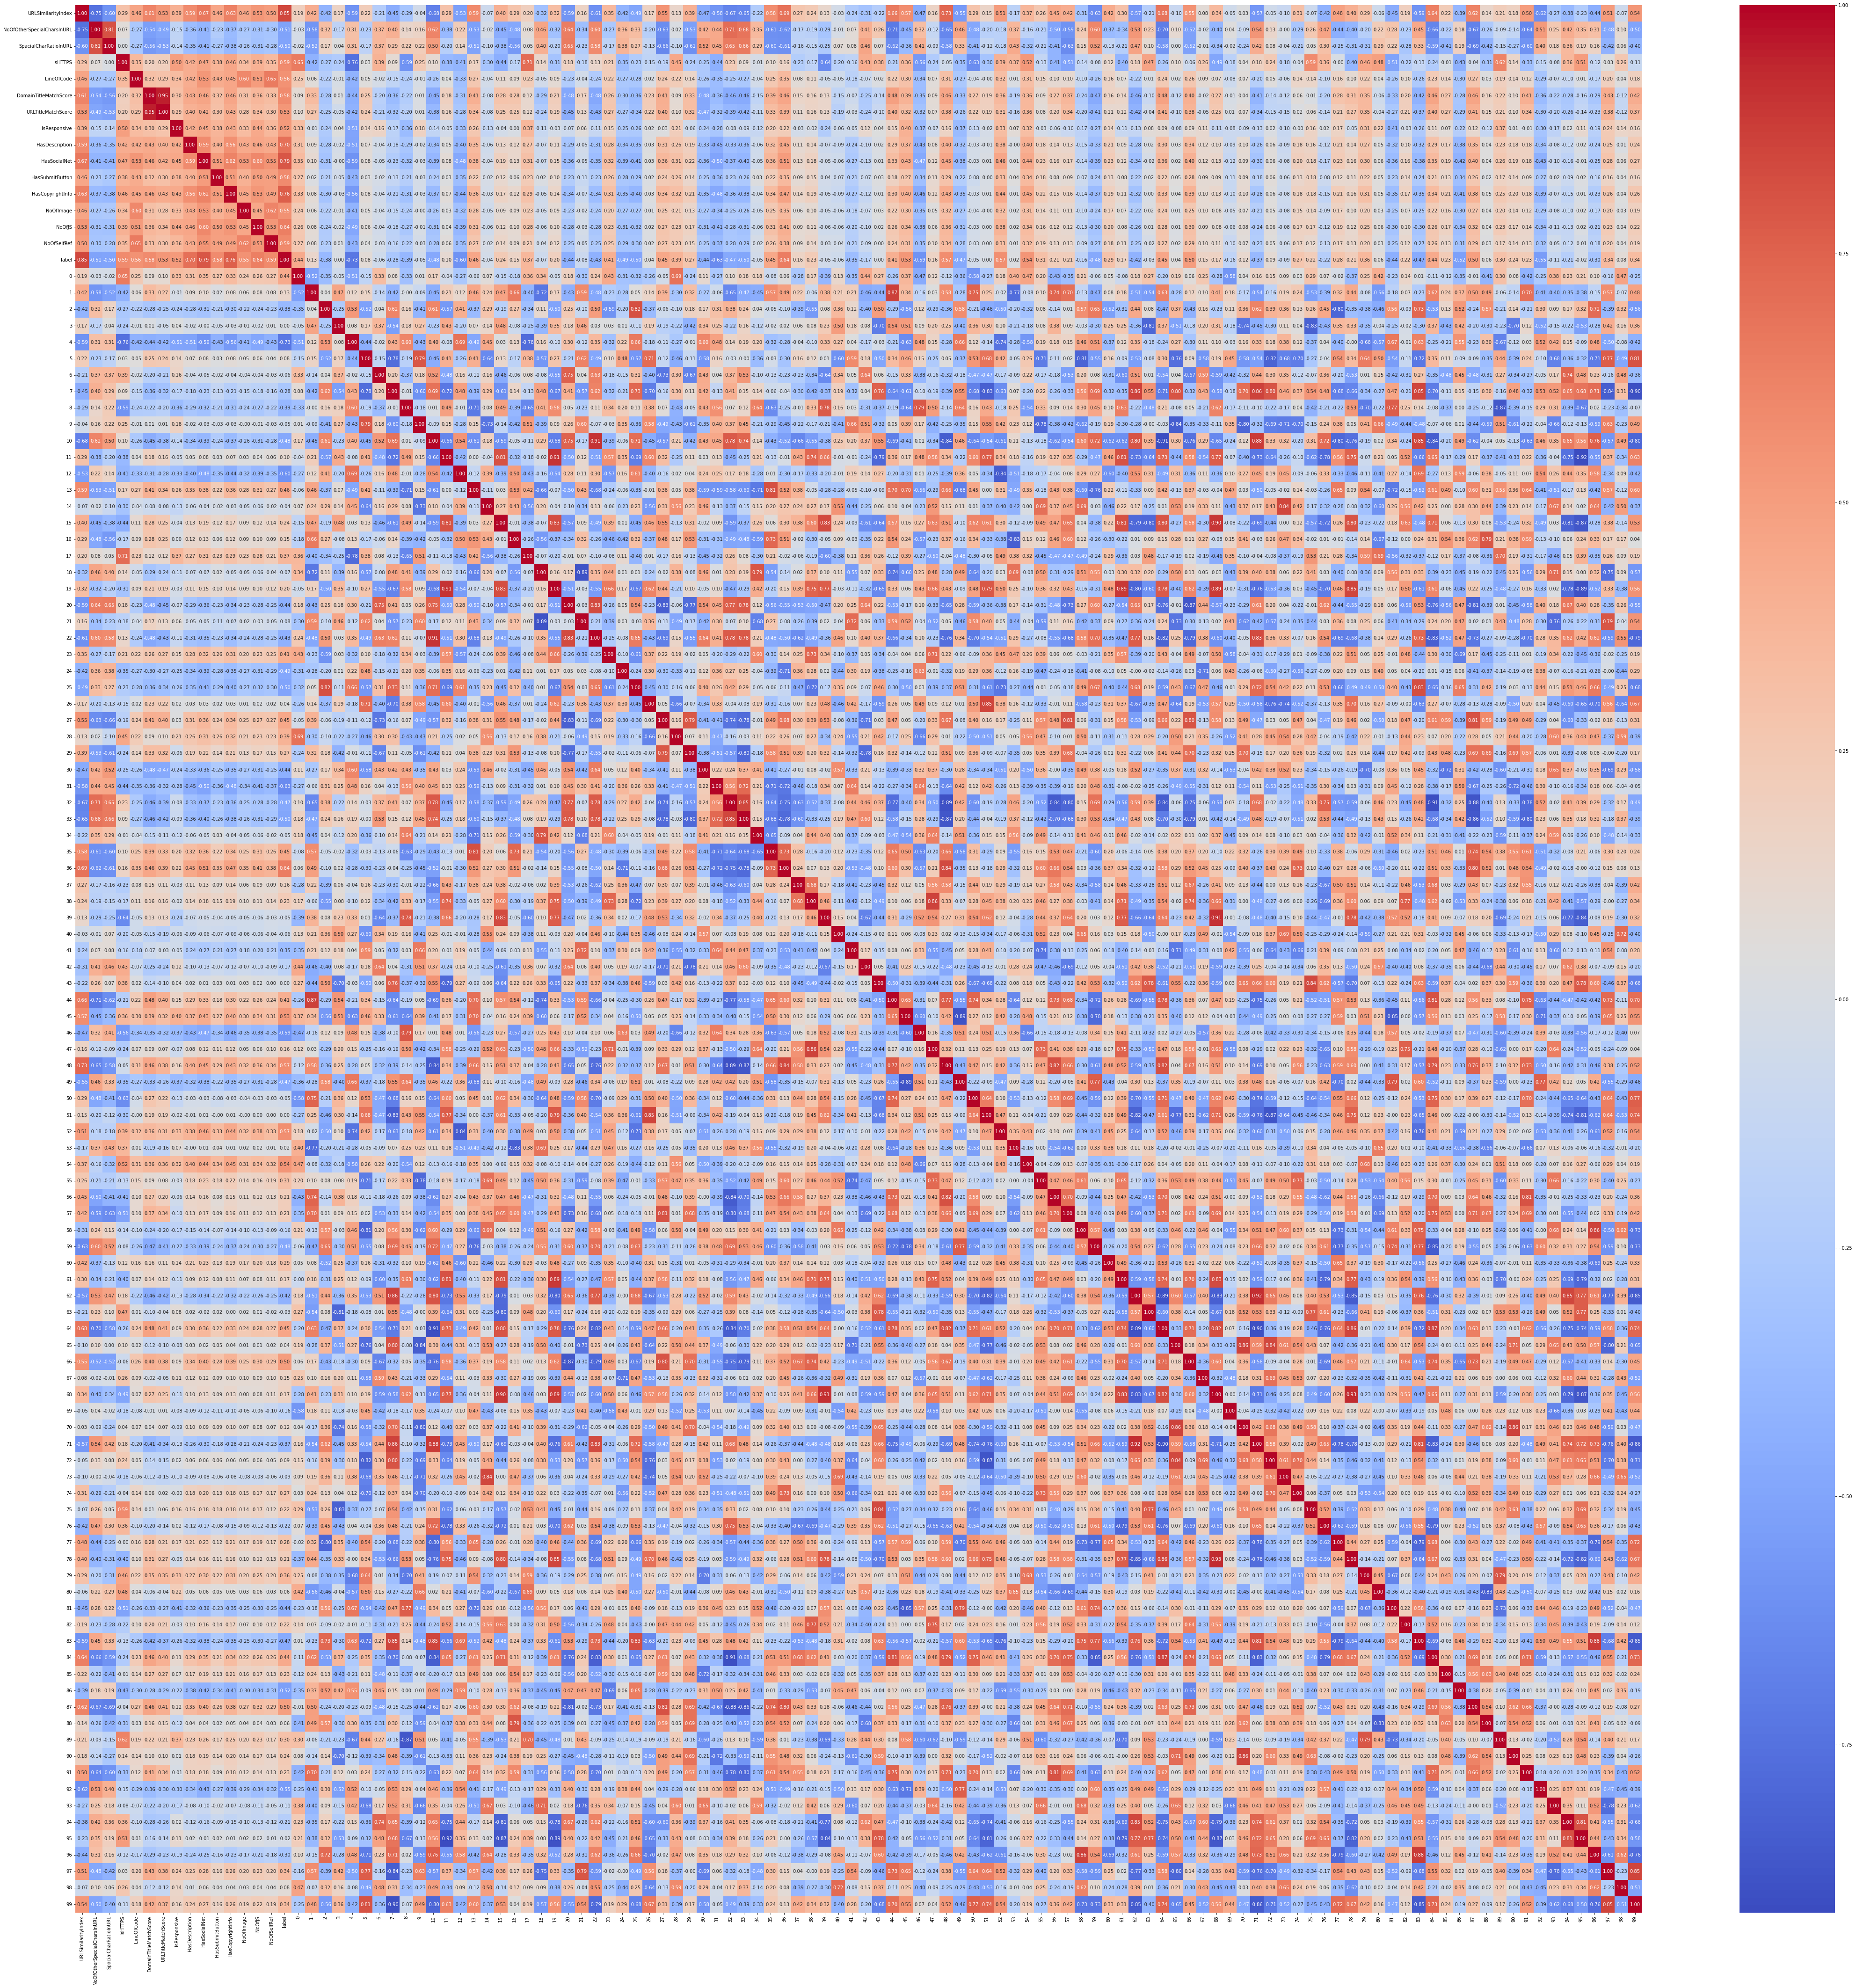

                            URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
URLSimilarityIndex                    1.000000                   -0.749040   
NoOfOtherSpecialCharsInURL           -0.749040                    1.000000   
SpacialCharRatioInURL                -0.595951                    0.807249   
IsHTTPS                               0.289131                    0.065941   
LineOfCode                            0.463567                   -0.271495   
...                                        ...                         ...   
95                                   -0.234774                    0.347623   
96                                   -0.443739                    0.312986   
97                                    0.507534                   -0.482364   
98                                   -0.067717                    0.098506   
99                                    0.535027                   -0.500458   

                            SpacialCharRatioInURL   IsHTTPS  Li

In [13]:
plt.figure(figsize=(75, 75))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('correlation_matrix.png')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

In [14]:
CORRELATION_THRESHOLD = 0.3

# Get the features that are highly correlated with the target
correlated_features = correlation_matrix['label'][abs(correlation_matrix['label']) > CORRELATION_THRESHOLD].index

# Display the highly correlated features
print(correlated_features)

# Drop all features that are not highly correlated with the target
combined_df = combined_df[correlated_features].drop(columns=['NoOfOtherSpecialCharsInURL', 'URLTitleMatchScore', 'URLSimilarityIndex'])

# Display the new dataframe
combined_df.head()

# change all column labels to strings
combined_df.columns = [str(col) for col in combined_df.columns]

Index([        'URLSimilarityIndex', 'NoOfOtherSpecialCharsInURL',
            'SpacialCharRatioInURL',                    'IsHTTPS',
                       'LineOfCode',      'DomainTitleMatchScore',
               'URLTitleMatchScore',               'IsResponsive',
                   'HasDescription',               'HasSocialNet',
                  'HasSubmitButton',           'HasCopyrightInfo',
                        'NoOfImage',                     'NoOfJS',
                      'NoOfSelfRef',                      'label',
                                  0,                            2,
                                  4,                            8,
                                 10,                           12,
                                 13,                           17,
                                 20,                           22,
                                 23,                           24,
                                 25,                          

In [15]:
combined_df.head()

SpacialCharRatioInURL  IsHTTPS  LineOfCode  DomainTitleMatchScore  \
55693                   0.143        1         108                    0.0   
52794                   0.103        1           9                    0.0   
145305                  0.111        1          58                    0.0   
72762                   0.033        1           9                    0.0   
28644                   0.100        1          63                    0.0   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  ...        79        81        83  \
55693                  0          0  ...  0.227729 -1.416630  0.844034   
52794                  0          0  ...  0.230514 -1.417971  0.847996   
145305                 0          0  ... -0.415526 -0.645411  1.059857   
72762                  0          0  ...  0.659439 -1.308249  0.070411   
28644                  0          1  ...  0.205612 -0.939412  0.480174   

              84        86        87        92        96        97        99  
55693   0.204009  0.581767  0.667046 -0.235727  0.485171  0.036137 -0.432297  
52794   0.204017  0.579862  0.661929 -0.232265  0.491681  0.032422 -0.431207  
145305 -1.478765  0.067459  0.747848  0.817153 -0.163173 -0.694592 -0.914812  
72762   1.612170  0.093349  1.721007 -0.084478 -0.096565  0.366184 -0.001177  
28644   0.719351  0.109847  1.126243  0.321846 -0.109354  0.088593 -0.268315  

[5 rows x 58 columns]

In [16]:
print(combined_df.shape[0])

144074


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 42

sklearn_models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=combined_df.shape[0]),
    'Support Vector Machine': SVC(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss') ,
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2)
}

In [18]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['label'])
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [23]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

In [24]:
results = {}

for name, model in sklearn_models.items():
    print(f'Training {name}...')
    y_pred = train_model(model, X_train, y_train, X_test, y_test)
    accuracy, report, confusion = evaluate_model(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(report)
    print(confusion)
    print()

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion': confusion
    }

Training Random Forest...
Random Forest accuracy: 0.9996529585285442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815

[[14553     8]
 [    2 14252]]

Training Logistic Regression...
Logistic Regression accuracy: 0.9991323963213604
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815

[[14545    16]
 [    9 14245]]

Training Support Vector Machine...
Support Vector Machine accuracy: 0.9819191393371508
              precision    recall  f1-score  